# Deep learning framework example: Movie Review Dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.

Before you run this notebook, you must ensure the corpus is installed.  Please see the `README.md` file for more information.

**Important**: Please see the Iris notebook example in the `zensols.deeplearn` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
from pathlib import Path
app_root_dir = Path('..')
sys.path.append(str(app_root_dir / 'src'))
# add the deepnlp path
sys.path.append('../../../src/python')

## Configure and create the app specific facade

Now that the interpreter environment is set up, we can import local packages.

In [2]:
import logging
from zensols.config import ImportConfigFactory
from zensols.deeplearn import TorchConfig
from zensols.deeplearn.batch import TorchMultiProcessStash
from movie import CliFactory, ReviewModelFacade

# set the random seed so things are predictable
TorchConfig.init()

# create a command line application factory
cli_factory = CliFactory.instance(root_dir=app_root_dir)

def create_facade(model: str = 'glove50'):
    """Create and return a facade with columns that fit a notebook."""
    # create a factoty that instantiates Python objects using a simple configuration (INI)
    facade = cli_factory.create_facade(['-c', str(app_root_dir / 'models' / f'{model}.conf')])
    # set console based logging
    facade.configure_jupyter(logging.WARNING)
    return facade

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [3]:
from zensols.config import Writable
# set indention level for human readable (pretty print like) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = create_facade()
facade.write()

executor:
  model: Review: glove_50 
  feature splits:
    split stash splits:
        dev: 1029 (9.2%)
        test: 2099 (18.7%)
        train: 8086 (72.1%)
        total: 11214


zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0


    total this instance: 11214
    keys consistent: True
  batch splits:
    split stash splits:
        dev: 6 (10.3%)
        test: 11 (19.0%)
        train: 41 (70.7%)
        total: 58
    total this instance: 58
    keys consistent: True
    delegate:
      name: batch_stash
      chunk_size: 0
      workers: 3
      batch_size: 200
      data_point_id_sets_path: ../data/batch/batch-point-keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'dependencies', 'glove_50_embedding', 'label', 'enums'}
      priming: False
  network settings:
    name: net_settings
    dropout: 0.2
    recurrent_settings:
      name: recurrent_settings
      dropout: 0.2
      network_type: lstm
      aggregation: max
      bidirectional: True
      hidden_size: 36
      num_layers: 1
    linear_settings:
      name: linear_settings
      dropout: 0.2
      out_features: 2
      middle_features:
        10
      

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 2s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 2 epochs using learning rate 0.001
  0%|                                                                                             | 0/2 [00:00<?, ?it/s]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:162.729|va min:122.398|va:119.650|lr:0.001 \/: 100%|███████████████████████████████████| 2/2 [00:01<00:00,  1.02it/s]zensols.

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/08/2021 20:30:26:299976
    ended: 05/08/2021 20:30:28:239846
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 2/2
    ave/min loss: 162.72907/53.22499
    accuracy: 0.173 (1402/8086)
    micro: F1: 0.173, precision: 0.173, recall: 0.173
    macro: F1: 0.171, precision: 0.169, recall: 0.173
    weighted: F1: 0.171, precision: 0.169, recall: 0.173
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 2/2
    ave/min loss: 119.65005/17.08849
    accuracy: 0.498 (512/1029)
    micro: F1: 0.498, precision: 0.498, recall: 0.498
    macro: F1: 0.332, precision: 0.249, recall: 0.500
    weighted: F1: 0.331, precision: 0.248, recall: 0.498
  test:
    started: 05/08/2021 20:30:28:843652
    ended: 05/08/2021 20:30:28:882432
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave/min loss

movie.model.ReviewNetwork (2)

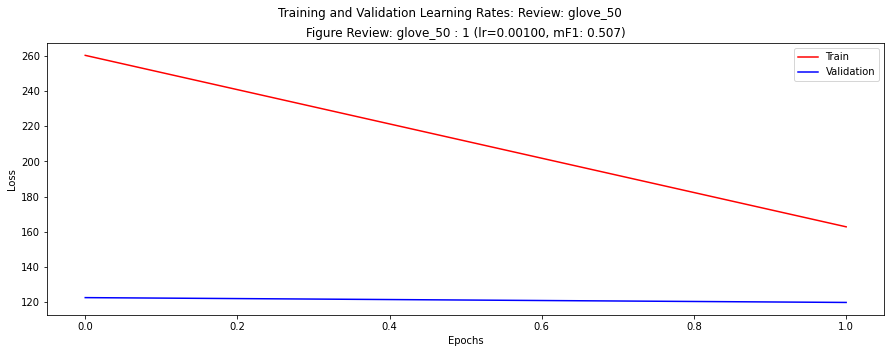

In [4]:
facade.epochs = 2
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 75 epochs using learning rate 0.001
  0%|                                                                                            | 0/75 [00:00<?, ?it/s]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:102.810|va min:89.247|va:89.654|lr:0.001 /\: 100%|███████████████████████████████████| 75/75 [01:43<00:00,  1.05s/it]zensols.deeplearn.model.executor.status: epoch threshold reached at 75
zensols.deeplearn.model.executor.status: final minimum validation loss: 89.2467779

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/08/2021 20:30:29:195197
    ended: 05/08/2021 20:32:12:283268
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 75/75
    ave/min loss: 102.81042/19.63741
    accuracy: 0.740 (5983/8086)
    micro: F1: 0.740, precision: 0.740, recall: 0.740
    macro: F1: 0.740, precision: 0.742, recall: 0.740
    weighted: F1: 0.740, precision: 0.742, recall: 0.740
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 72/75
    ave/min loss: 89.24678/11.32484
    accuracy: 0.742 (764/1029)
    micro: F1: 0.742, precision: 0.742, recall: 0.742
    macro: F1: 0.741, precision: 0.747, recall: 0.743
    weighted: F1: 0.741, precision: 0.748, recall: 0.742
  test:
    started: 05/08/2021 20:32:12:836503
    ended: 05/08/2021 20:32:12:876255
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave/min l

movie.model.ReviewNetwork (2)

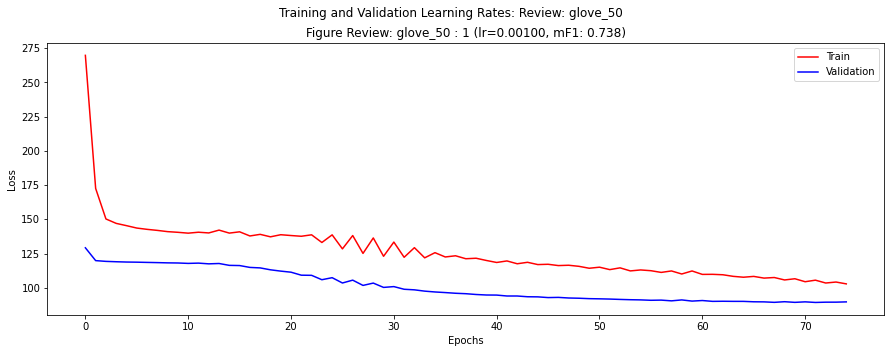

In [5]:
facade.epochs = 75
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

zensols.deepnlp.embed.word2vec: reading binary vector file
zensols.deepnlp.embed.word2vec: loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
zensols.deepnlp.embed.word2vec: loaded key model from /home/landes/view/nlp/deepnlp/example/movie/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 53s
zensols.deepnlp.embed.word2vec: loaded word2vec model in 53s
zensols.deepnlp.embed.word2vec: created data structures in 12s
zensols.deepnlp.embed.domain: created tensor vectory matrix on use cuda: True, device: cuda:0
zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deepnlp.embed.word2vec: reading binary vector file
zensols.deepnlp.embed.word2vec: loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
zensols.deepnlp.embed.word2vec: loaded key model from /home/landes/view/nlp/deepnlp/example/movie/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 52s
zensols.deepnlp.embed

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/08/2021 20:34:42:427723
    ended: 05/08/2021 20:35:35:862297
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 45/45
    ave/min loss: 96.43943/17.48549
    accuracy: 0.763 (6168/8086)
    micro: F1: 0.763, precision: 0.763, recall: 0.763
    macro: F1: 0.763, precision: 0.764, recall: 0.763
    weighted: F1: 0.763, precision: 0.764, recall: 0.763
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 41/45
    ave/min loss: 84.07312/9.36197
    accuracy: 0.761 (783/1029)
    micro: F1: 0.761, precision: 0.761, recall: 0.761
    macro: F1: 0.761, precision: 0.763, recall: 0.761
    weighted: F1: 0.760, precision: 0.763, recall: 0.761
  test:
    started: 05/08/2021 20:35:40:173572
    ended: 05/08/2021 20:35:40:211751
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave/min los

movie.model.ReviewNetwork (2)

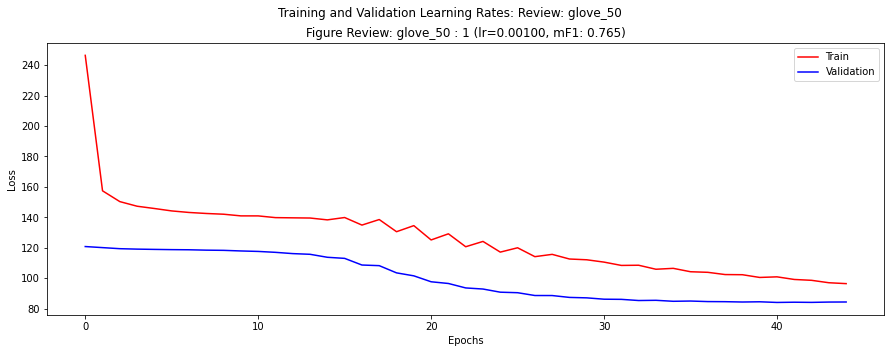

In [6]:
facade.epochs = 45
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
#facade.persist_result()

zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 45 epochs using learning rate 0.001
  0%|                                                   | 0/45 [00:00<?, ?it/s]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:92.204|va min:84.044|va:84.152|lr:0.001 /\: 100%|█| 45/45 [00:54<00:00,  1.3zensols.deeplearn.model.executor.status: epoch threshold reached at 45
zensols.deeplearn.model.executor.status: final minimum validation loss: 84.04418356716633, 39 decreases
zensols.deeplearn.model.executor.status: executed train in 5

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/08/2021 20:35:42:201864
    ended: 05/08/2021 20:36:36:964276
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 45/45
    ave/min loss: 92.20441/10.18034
    accuracy: 0.784 (6339/8086)
    micro: F1: 0.784, precision: 0.784, recall: 0.784
    macro: F1: 0.784, precision: 0.785, recall: 0.784
    weighted: F1: 0.784, precision: 0.785, recall: 0.784
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 44/45
    ave/min loss: 84.04418/9.04732
    accuracy: 0.773 (795/1029)
    micro: F1: 0.773, precision: 0.773, recall: 0.773
    macro: F1: 0.772, precision: 0.778, recall: 0.773
    weighted: F1: 0.772, precision: 0.778, recall: 0.773
  test:
    started: 05/08/2021 20:36:39:741624
    ended: 05/08/2021 20:36:39:779691
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave/min los

movie.model.ReviewNetwork (2)

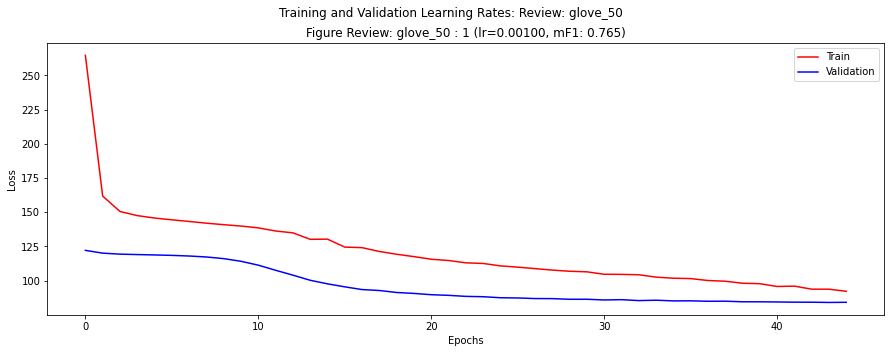

In [7]:
facade.dropout = 0.1
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 9s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 40 epochs using learning rate 0.001
  0%|                                                   | 0/40 [00:00<?, ?it/s]zensols.deeplearn.model.executor.status: watching update file 

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/08/2021 20:36:58:298581
    ended: 05/08/2021 20:37:43:997715
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 40/40
    ave/min loss: 62.53425/3.29123
    accuracy: 0.862 (6967/8086)
    micro: F1: 0.862, precision: 0.862, recall: 0.862
    macro: F1: 0.862, precision: 0.862, recall: 0.862
    weighted: F1: 0.862, precision: 0.862, recall: 0.862
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 30/40
    ave/min loss: 83.38406/7.52322
    accuracy: 0.774 (796/1029)
    micro: F1: 0.774, precision: 0.774, recall: 0.774
    macro: F1: 0.769, precision: 0.797, recall: 0.774
    weighted: F1: 0.769, precision: 0.797, recall: 0.774
  test:
    started: 05/08/2021 20:37:46:432736
    ended: 05/08/2021 20:37:46:479960
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave/min loss

movie.model.ReviewNetwork (2)

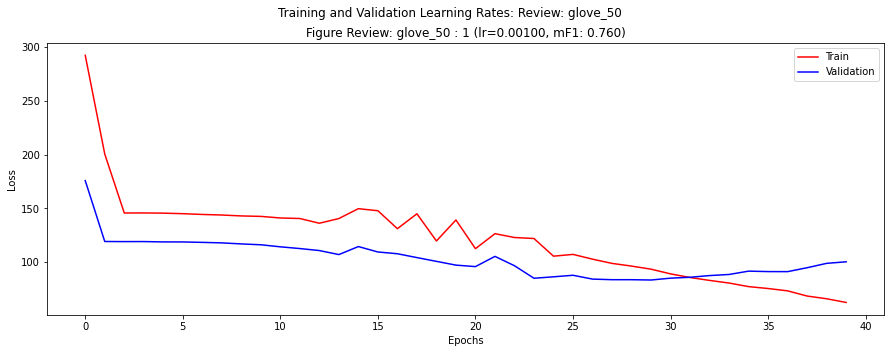

In [8]:
facade.embedding = 'transformer_embedding'
facade.epochs = 40
facade.language_attributes = set()
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 30s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 40 epochs using learning rate 0.001
  0%|                                                   | 0/40 [00:00<?, ?it/s]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:61.761|va min:78.952|va:92.988|lr:0.0001 /\: 100%|█| 40/40 [00:45<00:

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/08/2021 20:38:19:969447
    ended: 05/08/2021 20:39:05:245533
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 40/40
    ave/min loss: 61.76101/5.42291
    accuracy: 0.862 (6971/8086)
    micro: F1: 0.862, precision: 0.862, recall: 0.862
    macro: F1: 0.862, precision: 0.863, recall: 0.862
    weighted: F1: 0.862, precision: 0.863, recall: 0.862
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 29/40
    ave/min loss: 78.95204/9.47274
    accuracy: 0.799 (822/1029)
    micro: F1: 0.799, precision: 0.799, recall: 0.799
    macro: F1: 0.796, precision: 0.816, recall: 0.799
    weighted: F1: 0.796, precision: 0.816, recall: 0.799
  test:
    started: 05/08/2021 20:39:12:449668
    ended: 05/08/2021 20:39:12:497669
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave/min loss

movie.model.ReviewNetwork (2)

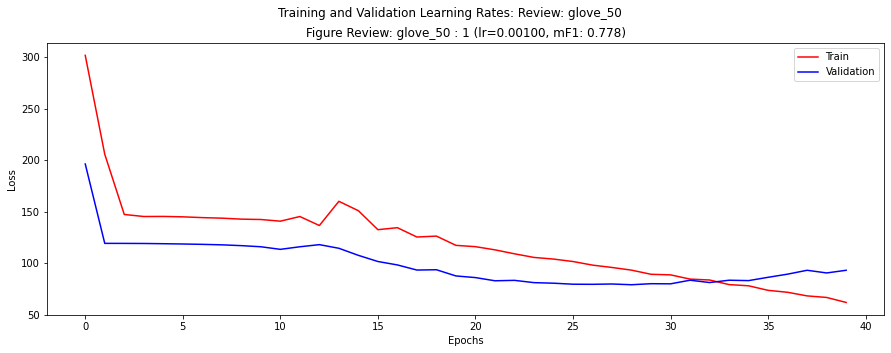

In [9]:
facade.embedding = 'transformer_embedding'
facade.language_attributes = {'enum_expander'}
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 30s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 40 epochs using learning rate 0.001
  0%|                                                   | 0/40 [00:00<?, ?it/s]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:51.388|va min:80.797|va:82.825|lr:0.0001 /\: 100%|█| 40/40 [00:44<00:

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/08/2021 20:39:46:202179
    ended: 05/08/2021 20:40:30:273901
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 40/40
    ave/min loss: 51.38842/12.83960
    accuracy: 0.889 (7185/8086)
    micro: F1: 0.889, precision: 0.889, recall: 0.889
    macro: F1: 0.888, precision: 0.893, recall: 0.889
    weighted: F1: 0.888, precision: 0.893, recall: 0.889
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 25/40
    ave/min loss: 80.79710/7.74270
    accuracy: 0.772 (794/1029)
    micro: F1: 0.772, precision: 0.772, recall: 0.772
    macro: F1: 0.766, precision: 0.802, recall: 0.772
    weighted: F1: 0.766, precision: 0.802, recall: 0.772
  test:
    started: 05/08/2021 20:40:37:536582
    ended: 05/08/2021 20:40:37:584393
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave/min los

movie.model.ReviewNetwork (2)

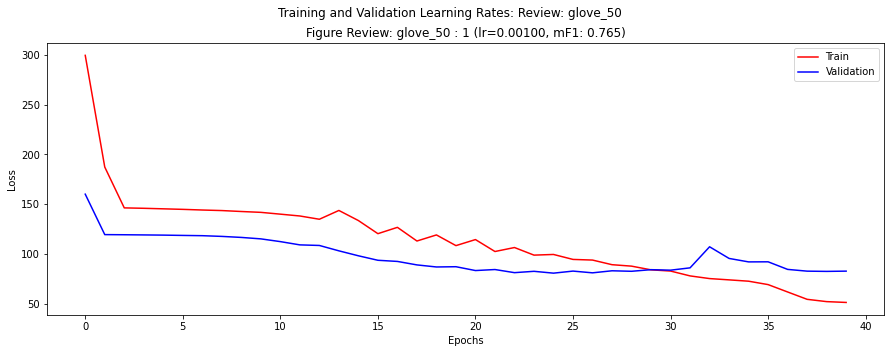

In [10]:
facade.embedding = 'transformer_embedding'
facade.language_attributes = {'dep_expander'}
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 51s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 40 epochs using learning rate 0.001
  0%|                                                   | 0/40 [00:00<?, ?it/s]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:42.660|va min:82.343|va:89.998|lr:0.0001 /\: 100%|█| 40/40 [00:44<00:

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/08/2021 20:41:32:504942
    ended: 05/08/2021 20:42:16:980008
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 40/40
    ave/min loss: 42.65967/4.32065
    accuracy: 0.905 (7319/8086)
    micro: F1: 0.905, precision: 0.905, recall: 0.905
    macro: F1: 0.905, precision: 0.909, recall: 0.905
    weighted: F1: 0.905, precision: 0.909, recall: 0.905
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 26/40
    ave/min loss: 82.34275/8.65078
    accuracy: 0.783 (806/1029)
    micro: F1: 0.783, precision: 0.783, recall: 0.783
    macro: F1: 0.779, precision: 0.808, recall: 0.784
    weighted: F1: 0.779, precision: 0.809, recall: 0.783
  test:
    started: 05/08/2021 20:42:29:090312
    ended: 05/08/2021 20:42:29:138654
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave/min loss

movie.model.ReviewNetwork (2)

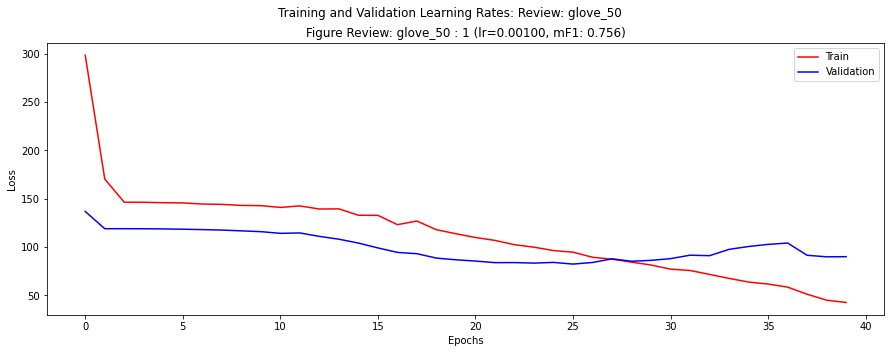

In [11]:
facade.embedding = 'transformer_embedding'
facade.language_attributes = {'enum_expander', 'dep_expander'}
epochs = 30
facade.train()
facade.test()
facade.write_result()
facade.plot_result()